# Preprocessing

## Dataset

### First tries with edges

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage

In [2]:
img = cv.imread("/root/code/iamjustnick/wavewatcher/raw_data/ElPortoBee__ocean__2022.png",0)
edges = cv.Canny(img,256,256)
#Mat grayscale(img.size(), CV_MAKETYPE(img.depth(), 1))

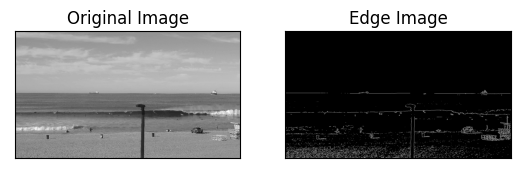

In [3]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

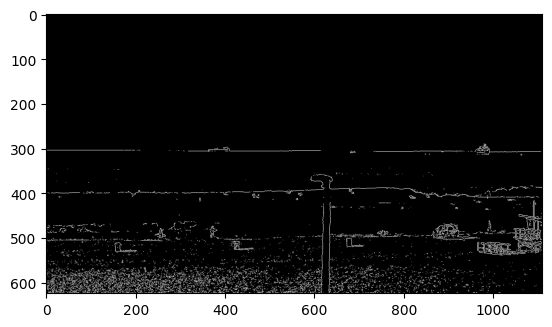

In [4]:
plt.imshow(edges,cmap = 'gray')

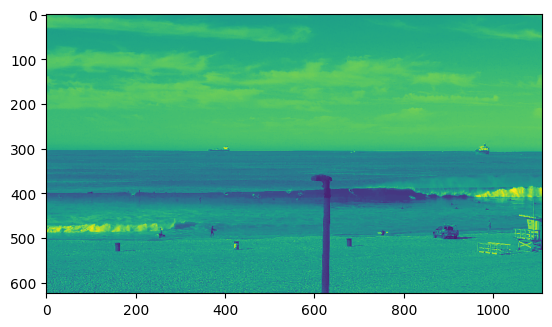

In [5]:
plt.imshow(img)

In [6]:
# /root/code/iamjustnick/wavewatcher/raw_data/ZarautzBee__ocean__2022-11-24_18_14_10__19.png
img2 = cv.imread("/root/code/iamjustnick/wavewatcher/raw_data/ZarautzBee__ocean__2022-11-24_18_14_10__19.png",1)
edges = cv.Canny(img2,624,1200)

In [7]:
edges.shape

(624, 1200)

In [8]:
img2.shape

(624, 1200, 3)

In [9]:
img.shape

(624, 1110)

In [10]:
# gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# edges = cv.Canny(gray_image,256,256)

In [11]:
# gray_image.shape

In [12]:
#/root/code/iamjustnick/wavewatcher/raw_data/HawaiBee__ocean__2022-11-24_18_08_51__7.png
img3 = cv.imread("/root/code/iamjustnick/wavewatcher/raw_data/HawaiBee__ocean__2022-11-24_18_08_51__7.png",0)
edges3 = cv.Canny(img3,624,1200)

In [13]:
img3.shape

(570, 1015)

In [14]:
# /root/code/iamjustnick/wavewatcher/raw_data/NigranBee__ocean__2022-11-24_18_08_16__6.png
img4 = cv.imread("/root/code/iamjustnick/wavewatcher/raw_data/NigranBee__ocean__2022-11-24_18_08_16__6.png",0)
edges4 = cv.Canny(img4,582,1034)

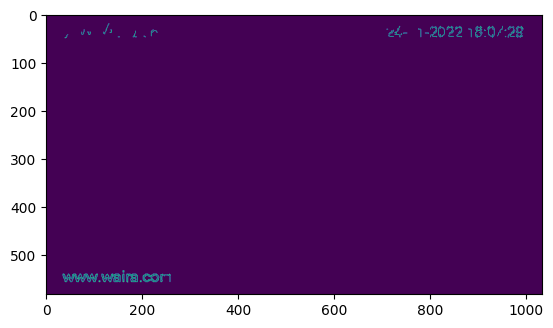

In [15]:
plt.imshow(edges4)

In [16]:
img4.shape

(582, 1034)

### Thresholds

In [17]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage.color
import skimage.filters
%matplotlib widget

In [18]:
path_1 = '/root/code/iamjustnick/wavewatcher/raw_data/HawaiBee__ocean__2022-11-24_18_08_51__7.png'
path_2 = '/root/code/iamjustnick/wavewatcher/raw_data/NigranBee__ocean__2022-11-24_18_08_16__6.png'
path_3 = '/root/code/iamjustnick/wavewatcher/raw_data/ZarautzBee__ocean__2022-11-24_18_14_10__19.png'
path_4 = '/root/code/iamjustnick/wavewatcher/raw_data/ElPortoBee__ocean__2022.png'

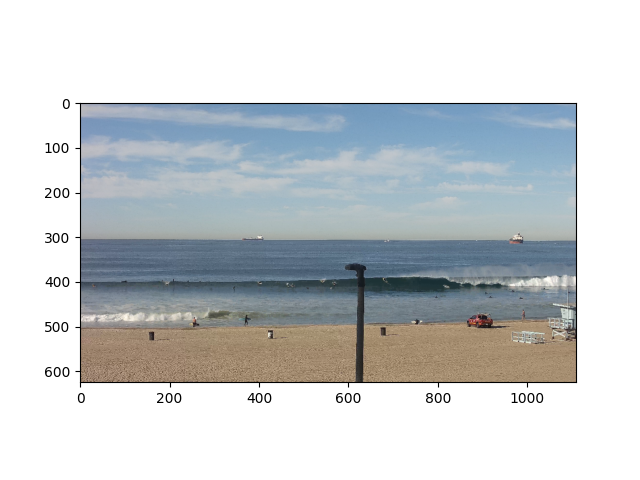

In [19]:
image = iio.imread(uri=path_4)

fig, ax = plt.subplots()
plt.imshow(image)

In [20]:
image.shape

(624, 1110, 4)

In [21]:
plt.imshow(image[245:500,:],cmap='gray')
plt.show

<function matplotlib.pyplot.show(block=None)>

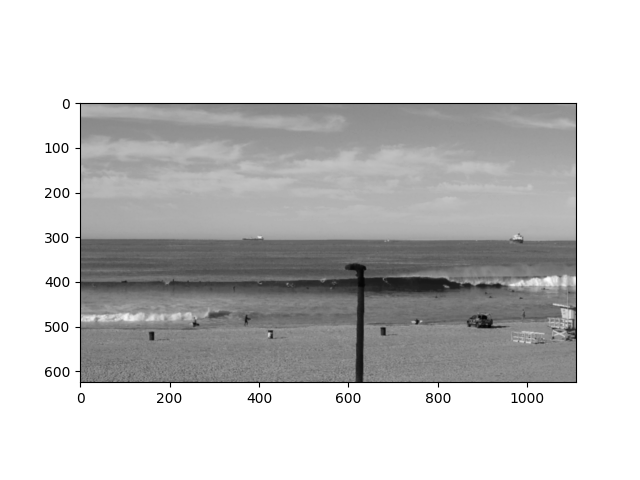

In [22]:
# convert the image to grayscale
new_im = image[:,:,:3]
gray_image = skimage.color.rgb2gray(new_im)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")

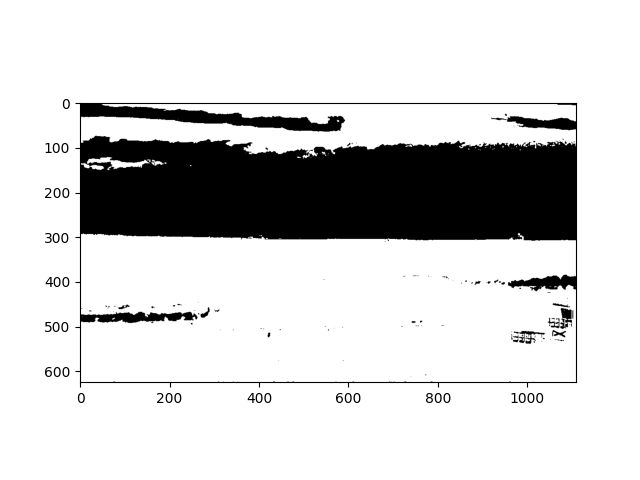

In [23]:
t = 0.65
binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

In [24]:
print(img.shape,img2.shape,img3.shape,img4.shape)

(624, 1110) (624, 1200, 3) (570, 1015) (582, 1034)


/tmp/ipykernel_9238/439545316.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')


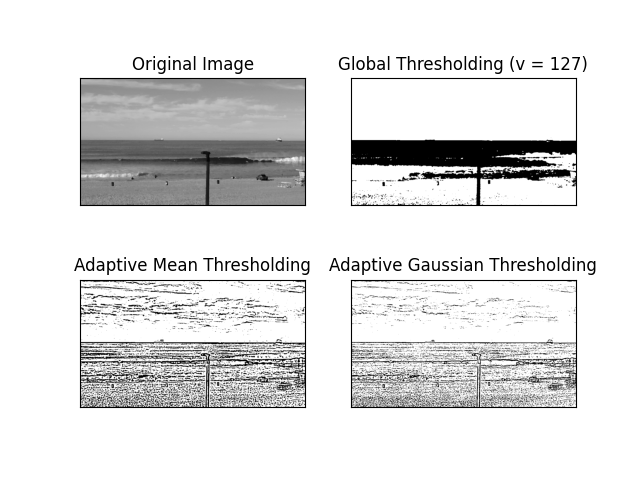

In [25]:
img = cv.imread(path_4,0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Greyscalling

In [26]:
from PIL import Image

In [27]:

img = img.convert('L')

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

## Normallizing

This can be done by adding a layer in the CNN

In [ ]:
 model.add(Rescaling(1./255, input_shape=(256,256,1)))

## Train and test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

## Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

In [ ]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator
datagen.fit(X_train)
datagen

## Small dataset

In [ ]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10
# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor))
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor))
# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]
print("------------------ Before -----------------")
print(images_train.shape, images_test.shape)
print("")
print("--- After applying the reduction factor ---")
print(images_train_small.shape, images_test_small.shape)
print("")
print("-"*43)
unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))